# Eliptic Envelope Algorithm

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope# this is important
sns.set_style("darkgrid")

In [2]:
# Make a simulated dataset with 2 features
# Normally distributed dataset
X, _ = make_blobs(n_samples=300, n_features=2,
                  centers=1, shuffle=True, random_state=1)

elpenv = EllipticEnvelope(contamination=0.025, 
                          random_state=1)

In [3]:
X[:5]

array([[-2.68144585,  5.20101811],
       [-0.97555858,  4.05307989],
       [-2.8793043 ,  6.85585852],
       [-1.61589091,  4.18017563],
       [-1.46126019,  4.52549851]])

In [4]:
# Returns 1 of inliers, -1 for outliers
pred = elpenv.fit_predict(X)
X[np.where(pred==-1)][:1]

array([[-4.16600056,  2.29232595]])

In [5]:
X[0]

array([-2.68144585,  5.20101811])

Text(0.5, 1.0, 'Elliptic Envelope Outlier Detection')

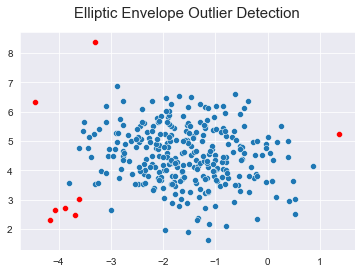

In [6]:
outlier_values = X[np.where(pred==-1)]

# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15, pad=15)
#plt.savefig("Elliptic Envelope Detection.png", dpi=80)

In [7]:
new_data = np.array([[-4,2]])
elpenv.predict(new_data)

array([-1])

In [8]:
new_data_II = np.array([[-1,5]])
elpenv.predict(new_data_II)

array([1])

# Isolation Forest Algorithm

In [9]:
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
data = load_iris()
X_1=data.data
X[-5:]

array([[-0.03190915,  4.74450157],
       [-2.84187803,  3.74073535],
       [-0.6145655 ,  5.01500457],
       [-2.26071671,  4.96256338],
       [-1.8371921 ,  2.89603349]])

Text(0, 0.5, 'PC2')

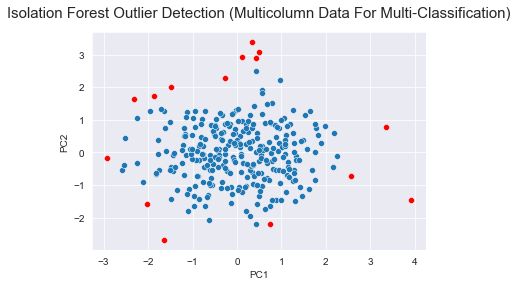

In [14]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.05, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)
pred = iforest.fit_predict(X)
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index] 
sc=StandardScaler()
X_scaled = sc.fit_transform(X)
outlier_values_scaled = sc.transform(outlier_values)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
outlier_values_pca = pca.transform(outlier_values_scaled)

# Plot the data
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0], 
                y=outlier_values_pca[:,1], color='r')
plt.title("Isolation Forest Outlier Detection (Multicolumn Data For Multi-Classification)", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")

# One-Class SVM Algorithm

In [15]:
from sklearn.svm import OneClassSVM
one_class_svm = OneClassSVM(kernel='rbf', degree=3, gamma='scale')

new_data = np.array([[-4, 8.5],[-1,5]])

pred=one_class_svm.fit(X)

# Make prediction
prediction = one_class_svm.predict(new_data)


Text(0.5, 1.0, 'One-Class SVM Novelty Detection')

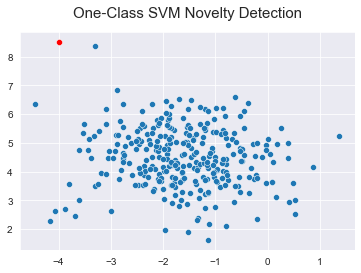

In [16]:
# Extract outliers
outlier_values = new_data[np.where(prediction==-1)]

# Plot the data
sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("One-Class SVM Novelty Detection", fontsize=15, pad=15)
#plt.savefig("One-Class SVM Detection.png", dpi=80)

# Local Outlier Factor (LOF) Algorithm 

In [17]:
from sklearn.neighbors import LocalOutlierFactor

In [18]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                         metric='minkowski', contamination=0.04,
                         novelty=False, n_jobs=-1)

Text(0.5, 1.0, 'LOF Outlier Detection')

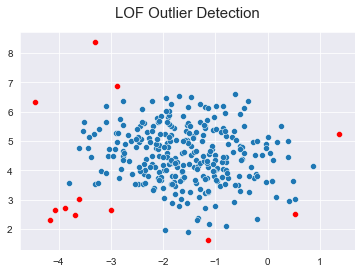

In [19]:
pred = lof.fit_predict(X)
outlier_values = X[np.where(pred==-1)]

sns.scatterplot(x=X[:,0], y=X[:,1])
sns.scatterplot(x=outlier_values[:,0], 
                y=outlier_values[:,1], color='r')
plt.title("LOF Outlier Detection", fontsize=15, pad=15)